In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [4]:
import numpy as np
digits.data = digits.data.astype(np.float32)
compactness, clusters, centers = cv2.kmeans(digits.data, 10, None, criteria, 10, flags)

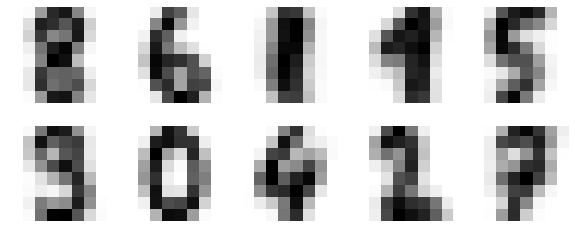

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
centers = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [11]:
from scipy.stats import mode
#函数作用：返回传入数组/矩阵中最常出现的成员以及出现的次数。
# 如果多个成员出现次数一样多，返回值小的那个。
labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel() == i)
    labels[mask] = mode(digits.target[mask])[0]                         

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7846410684474123